<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Import Standard Libraries
    </h1>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip install keras

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image

In [4]:
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img, img_to_array
#from keras.preprocessing.image import load_img, 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Exploratory Data Analysis
    </h1>
</div>

In [5]:
# dataset: 
folder_path="/kaggle/input/face-expression-recognition-dataset/images/"
TRAIN_PATH = folder_path + 'train'
TEST_PATH = folder_path + 'validation'
print(TRAIN_PATH)
print(TEST_PATH)

/kaggle/input/face-expression-recognition-dataset/images/train
/kaggle/input/face-expression-recognition-dataset/images/validation


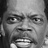

In [6]:
image_sample = Image.open(folder_path + '/train/angry/10.jpg')
image_sample

Image shape: (48, 48)
Image data array: [[ 72  78  81 ...  52  43  40]
 [ 65  62  59 ...  55  52  45]
 [ 47  42  60 ...  47  54  49]
 ...
 [ 91  65  46 ...  74  54  43]
 [ 76  80  76 ... 108  69  46]
 [ 77  74  81 ... 105 108  82]]
Image array shape: (48, 48)


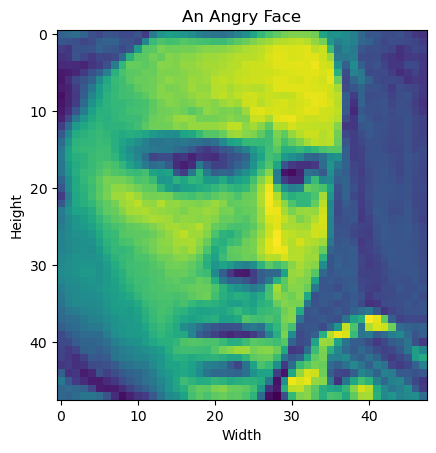

In [7]:
# Get the shape of the image
train_angry_img_path = folder_path + '/train/angry'
image=plt.imread(train_angry_img_path+'/0.jpg')
print(f'Image shape: {image.shape}')

# Convert image data (like jpeg) to numpy using asarray()
image_array = np.asarray(image)
print(f'Image data array: {image_array}')

# Get the shape of the image array
print(f'Image array shape: {image_array.shape}')

# Printing the image 
plt.imshow(image_array)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('An Angry Face')
plt.show()

In [8]:
# Get the list of folders in the directory as classes
classes=os.listdir(TRAIN_PATH+'/')
classes

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [9]:
# Get dictionary list of image count per class
def class_sample(type):
    if type.lower() == 'test' or type.lower() == 'train':
        path=''
        if type.lower() == 'train':    
            path= TRAIN_PATH
        else:
            path= TEST_PATH
        
        filepath=path+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
    else:
        raise ValueError('Invalid type. Must be "test" or "train".')


def test_train_distribution():
      print("---- Train Set ----")
#       avg_train=class_sample('train')[0]/len(class_sample('train')[1])
      print(f'Train class distribution:\n{class_sample("train")[2]}')
#       print("Average train class: ",round(avg_train))    
      print('Total train: ', class_sample('train')[0])

      print("\n---- Validation Set ----")
#       avg_test=class_sample('test')[0]/len(class_sample('test')[1])
      print(f'Test class distribution:\n{class_sample("test")[2]}')
#       print("Average test class: ",round(avg_test)) 
      print('Total test: ', class_sample('test')[0])

test_train_distribution()

---- Train Set ----
Train class distribution:
{'surprise': 3205, 'fear': 4103, 'angry': 3993, 'neutral': 4982, 'sad': 4938, 'disgust': 436, 'happy': 7164}
Total train:  28821

---- Validation Set ----
Test class distribution:
{'surprise': 797, 'fear': 1018, 'angry': 960, 'neutral': 1216, 'sad': 1139, 'disgust': 111, 'happy': 1825}
Total test:  7066


<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Data Visualization
    </h1>
</div>

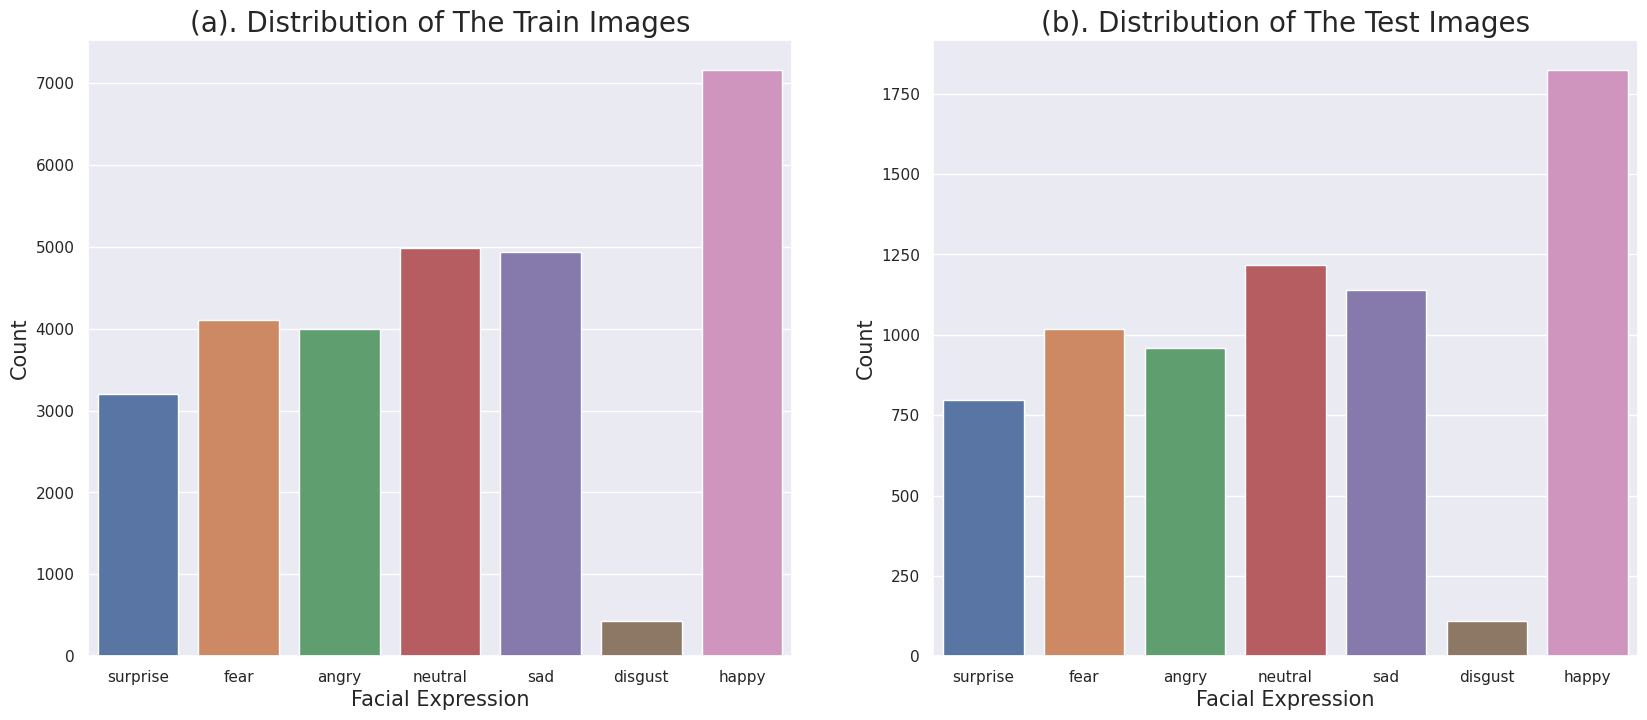

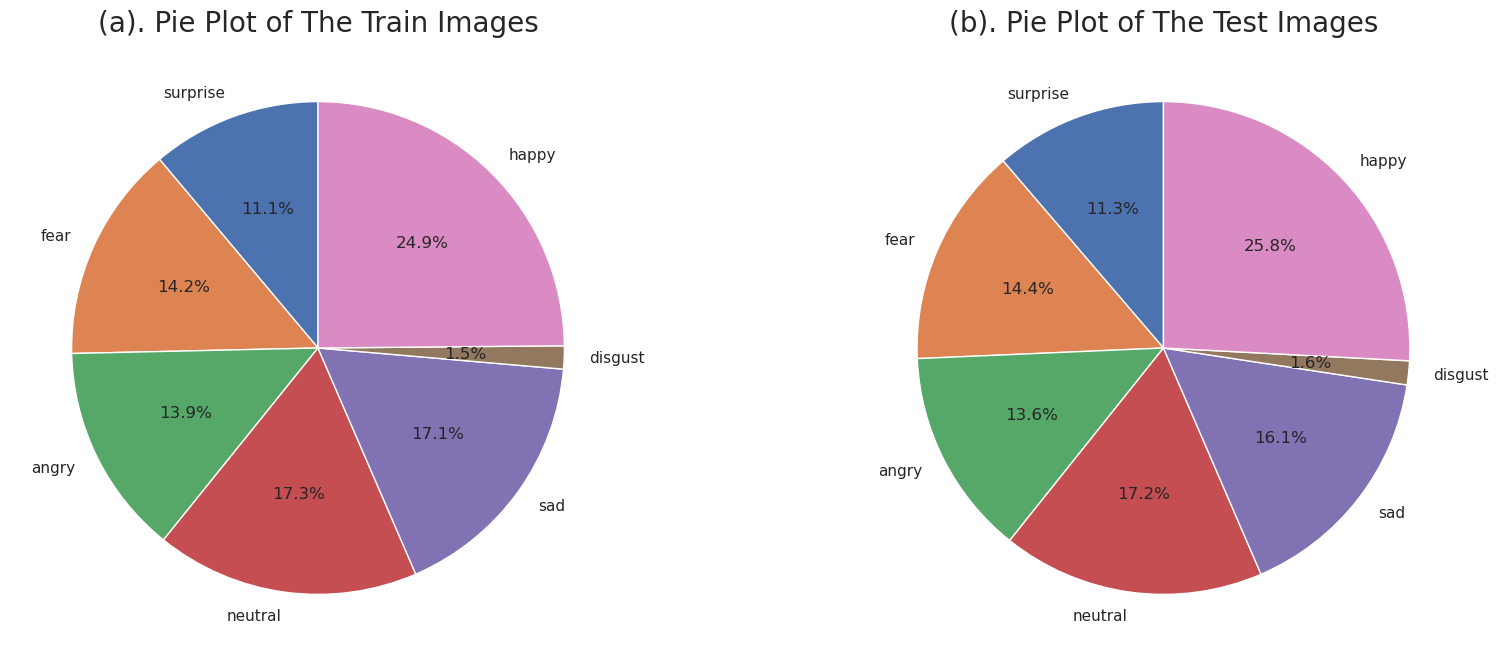

In [10]:
df_train = pd.DataFrame(list(class_sample("train")[2].items()), columns=['Emotion', 'Count'])
df_train.index.name = 'Emotion'
df_test = pd.DataFrame(list(class_sample("test")[2].items()), columns=['Emotion', 'Count'])
df_test.index.name = 'Emotion'

# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
axis = sns.barplot(x='Emotion', y='Count', data=df_train, orient='v')
# set labels and title
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("(a). Distribution of The Train Images", fontsize=20)

plt.subplot(1, 2, 2)
sns.barplot(x='Emotion', y='Count', data=df_test, orient='v')
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("(b). Distribution of The Test Images", fontsize=20)
plt.show()

print('\n\n')

x_train = np.array([ len(os.listdir(TRAIN_PATH+'/'+class_name+'/')) for class_name in classes])
x_test = np.array([ len(os.listdir(TEST_PATH+'/'+class_name+'/')) for class_name in classes])
label = classes
  
# plot a Pie plot with vertical orientation
plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
plt.pie(x_train, labels=label, autopct='%1.1f%%', startangle=90)
ax.set_title('(a). Pie Plot of The Train Images', fontsize=20)

ay = plt.subplot(1, 2, 2)
plt.pie(x_test, labels=label, autopct='%1.1f%%', startangle=90)
ay.set_title('(b). Pie Plot of The Test Images', fontsize=20)
plt.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Data Preprocessing
    </h1>
</div>

# Data Augmentation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and other parameters
picture_size = 48
batch_size = 64
no_of_classes = 7
epochs = 48

datagen_train = ImageDataGenerator (
                                    rescale=1./255, 
                                    validation_split=0.2
                                    )

datagen_val   = ImageDataGenerator (
                                    rescale=1./255
                                    )

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Create Train, Validation, Test Generators
    </h1>
</div>

In [12]:
train_set = datagen_train.flow_from_directory(
    TRAIN_PATH,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_set = datagen_val.flow_from_directory(
    TEST_PATH,
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">More on Data Analysis
    </h1>
</div>

In [13]:
class_dictionary = train_set.class_indices
class_keys = list(train_set.class_indices.keys())
class_values = list(train_set.class_indices.values())
class_count = len(class_keys)

train_images, train_labels = next(train_set)
validation_images, validation_labels = next(val_set)

print(f'\nThere are 7 classes: {classes}')
print(f'The class dictionary are: {class_dictionary}')
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)
print('\nX_test shape: ', validation_images.shape)
print('y_test shape: ', validation_labels.shape)

print('\ntrain_set size: ', train_set.samples)
print('val_set size: ', val_set.samples)

print('\ntrain_set labels: ', train_set.labels)
print('val_set labels: ', val_set.labels)


There are 7 classes: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
The class dictionary are: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Class count:  7

X_train shape:  (64, 48, 48, 1)
y_train shape:  (64, 7)

X_test shape:  (64, 48, 48, 1)
y_test shape:  (64, 7)

train_set size:  28821
val_set size:  7066

train_set labels:  [0 0 0 ... 6 6 6]
val_set labels:  [0 0 0 ... 6 6 6]


In [14]:
class_indices = train_set.class_indices
class_counts = {class_name: 0 for class_name in class_indices}
num_images = train_set.samples

batch_size = train_set.batch_size
num_batches = len(train_set)

for i in range(num_batches):
    batch = next(train_set)
    images, labels = batch
    for j in range(len(labels)):
        label = np.argmax(labels[j])  # convert one-hot encoding to integer label
        class_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        class_counts[class_name] += 1

print(class_counts)
print(f"Total number of images in train generator: {num_images}")

{'angry': 3996, 'disgust': 434, 'fear': 4106, 'happy': 7163, 'neutral': 4974, 'sad': 4942, 'surprise': 3206}
Total number of images in train generator: 28821


<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">More on Data Visualization
    </h1>
</div>

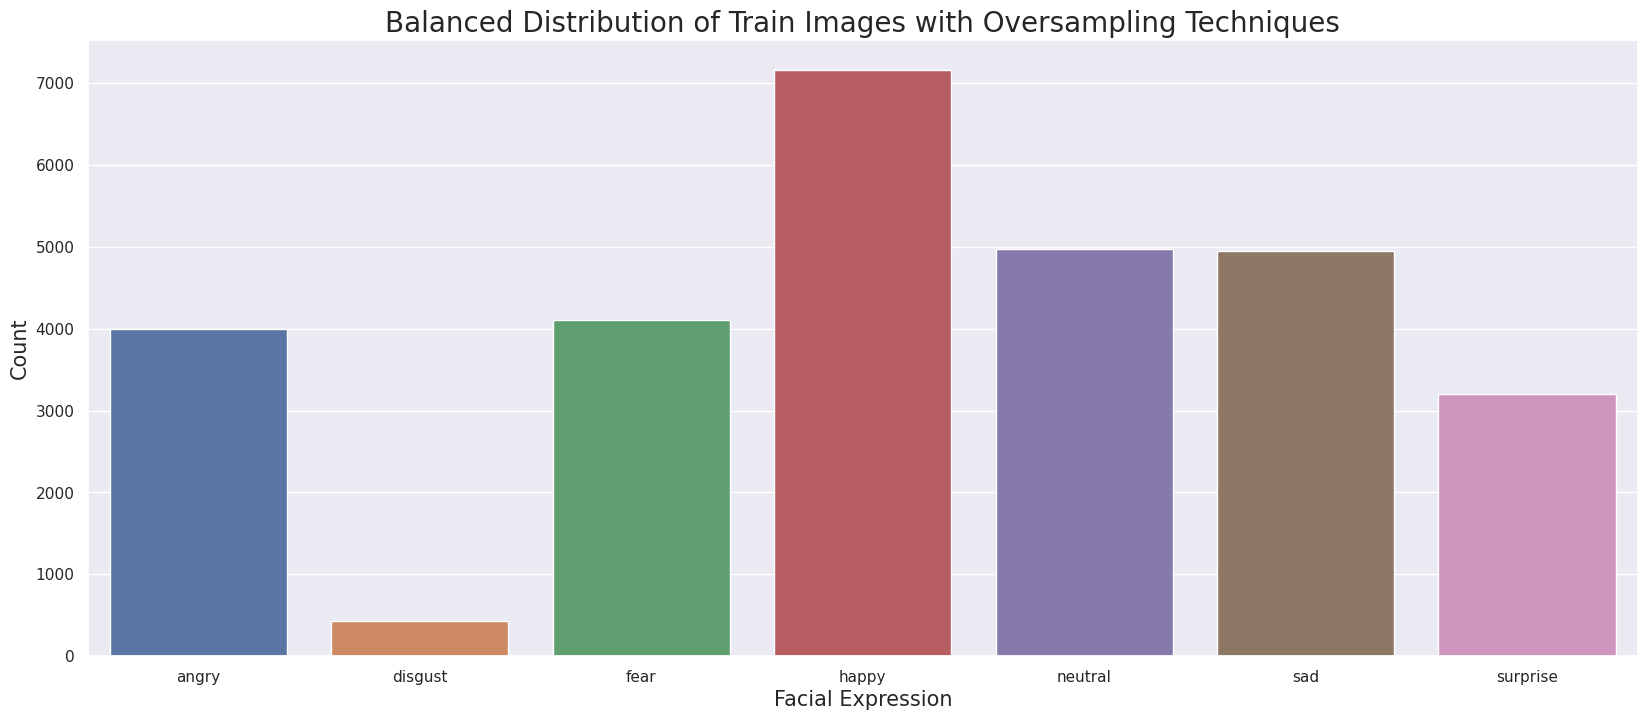

In [15]:
df_train_gen = pd.DataFrame(list(class_counts.items()), columns=['Emotion', 'Count'])
df_train_gen.index.name = 'Emotion'


# plot a barplot with vertical orientation
sns.set()
plt.figure(figsize=(20, 8))
sns.barplot(x='Emotion', y='Count', data=df_train_gen, orient='v')
plt.xlabel("Facial Expression", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Balanced Distribution of Train Images with Oversampling Techniques", fontsize=20)
plt.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Model Development
    </h1>
</div>

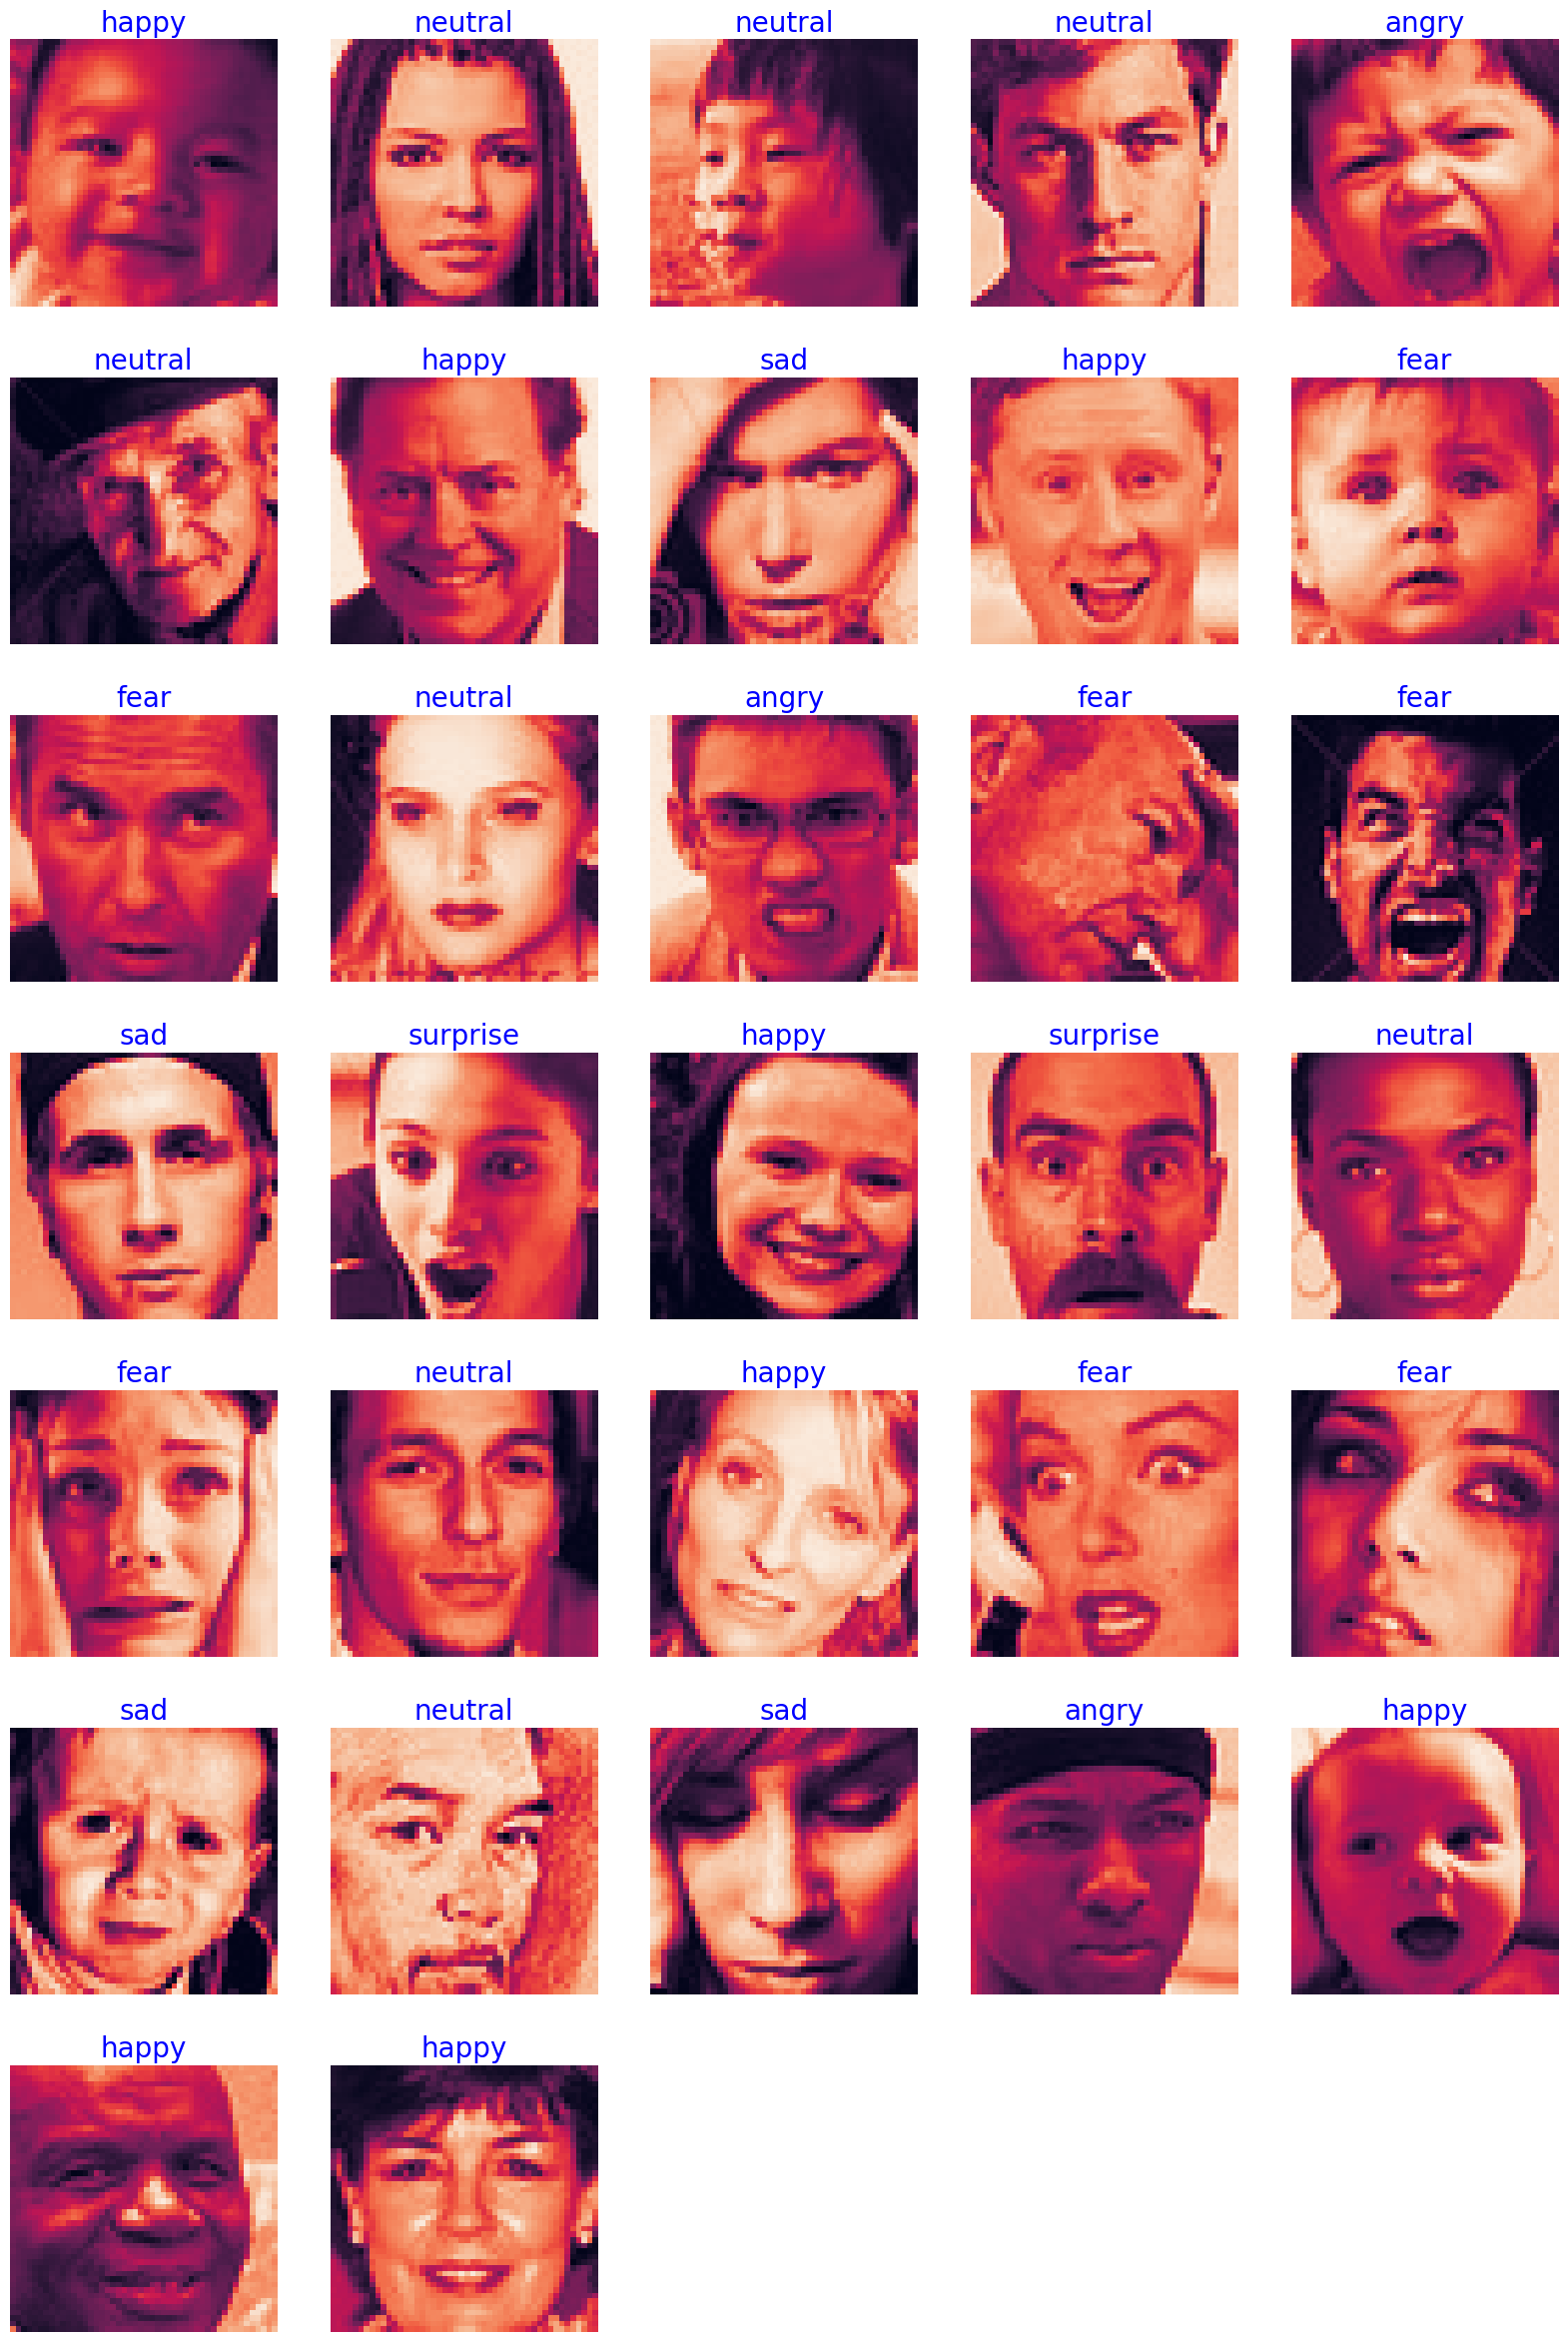

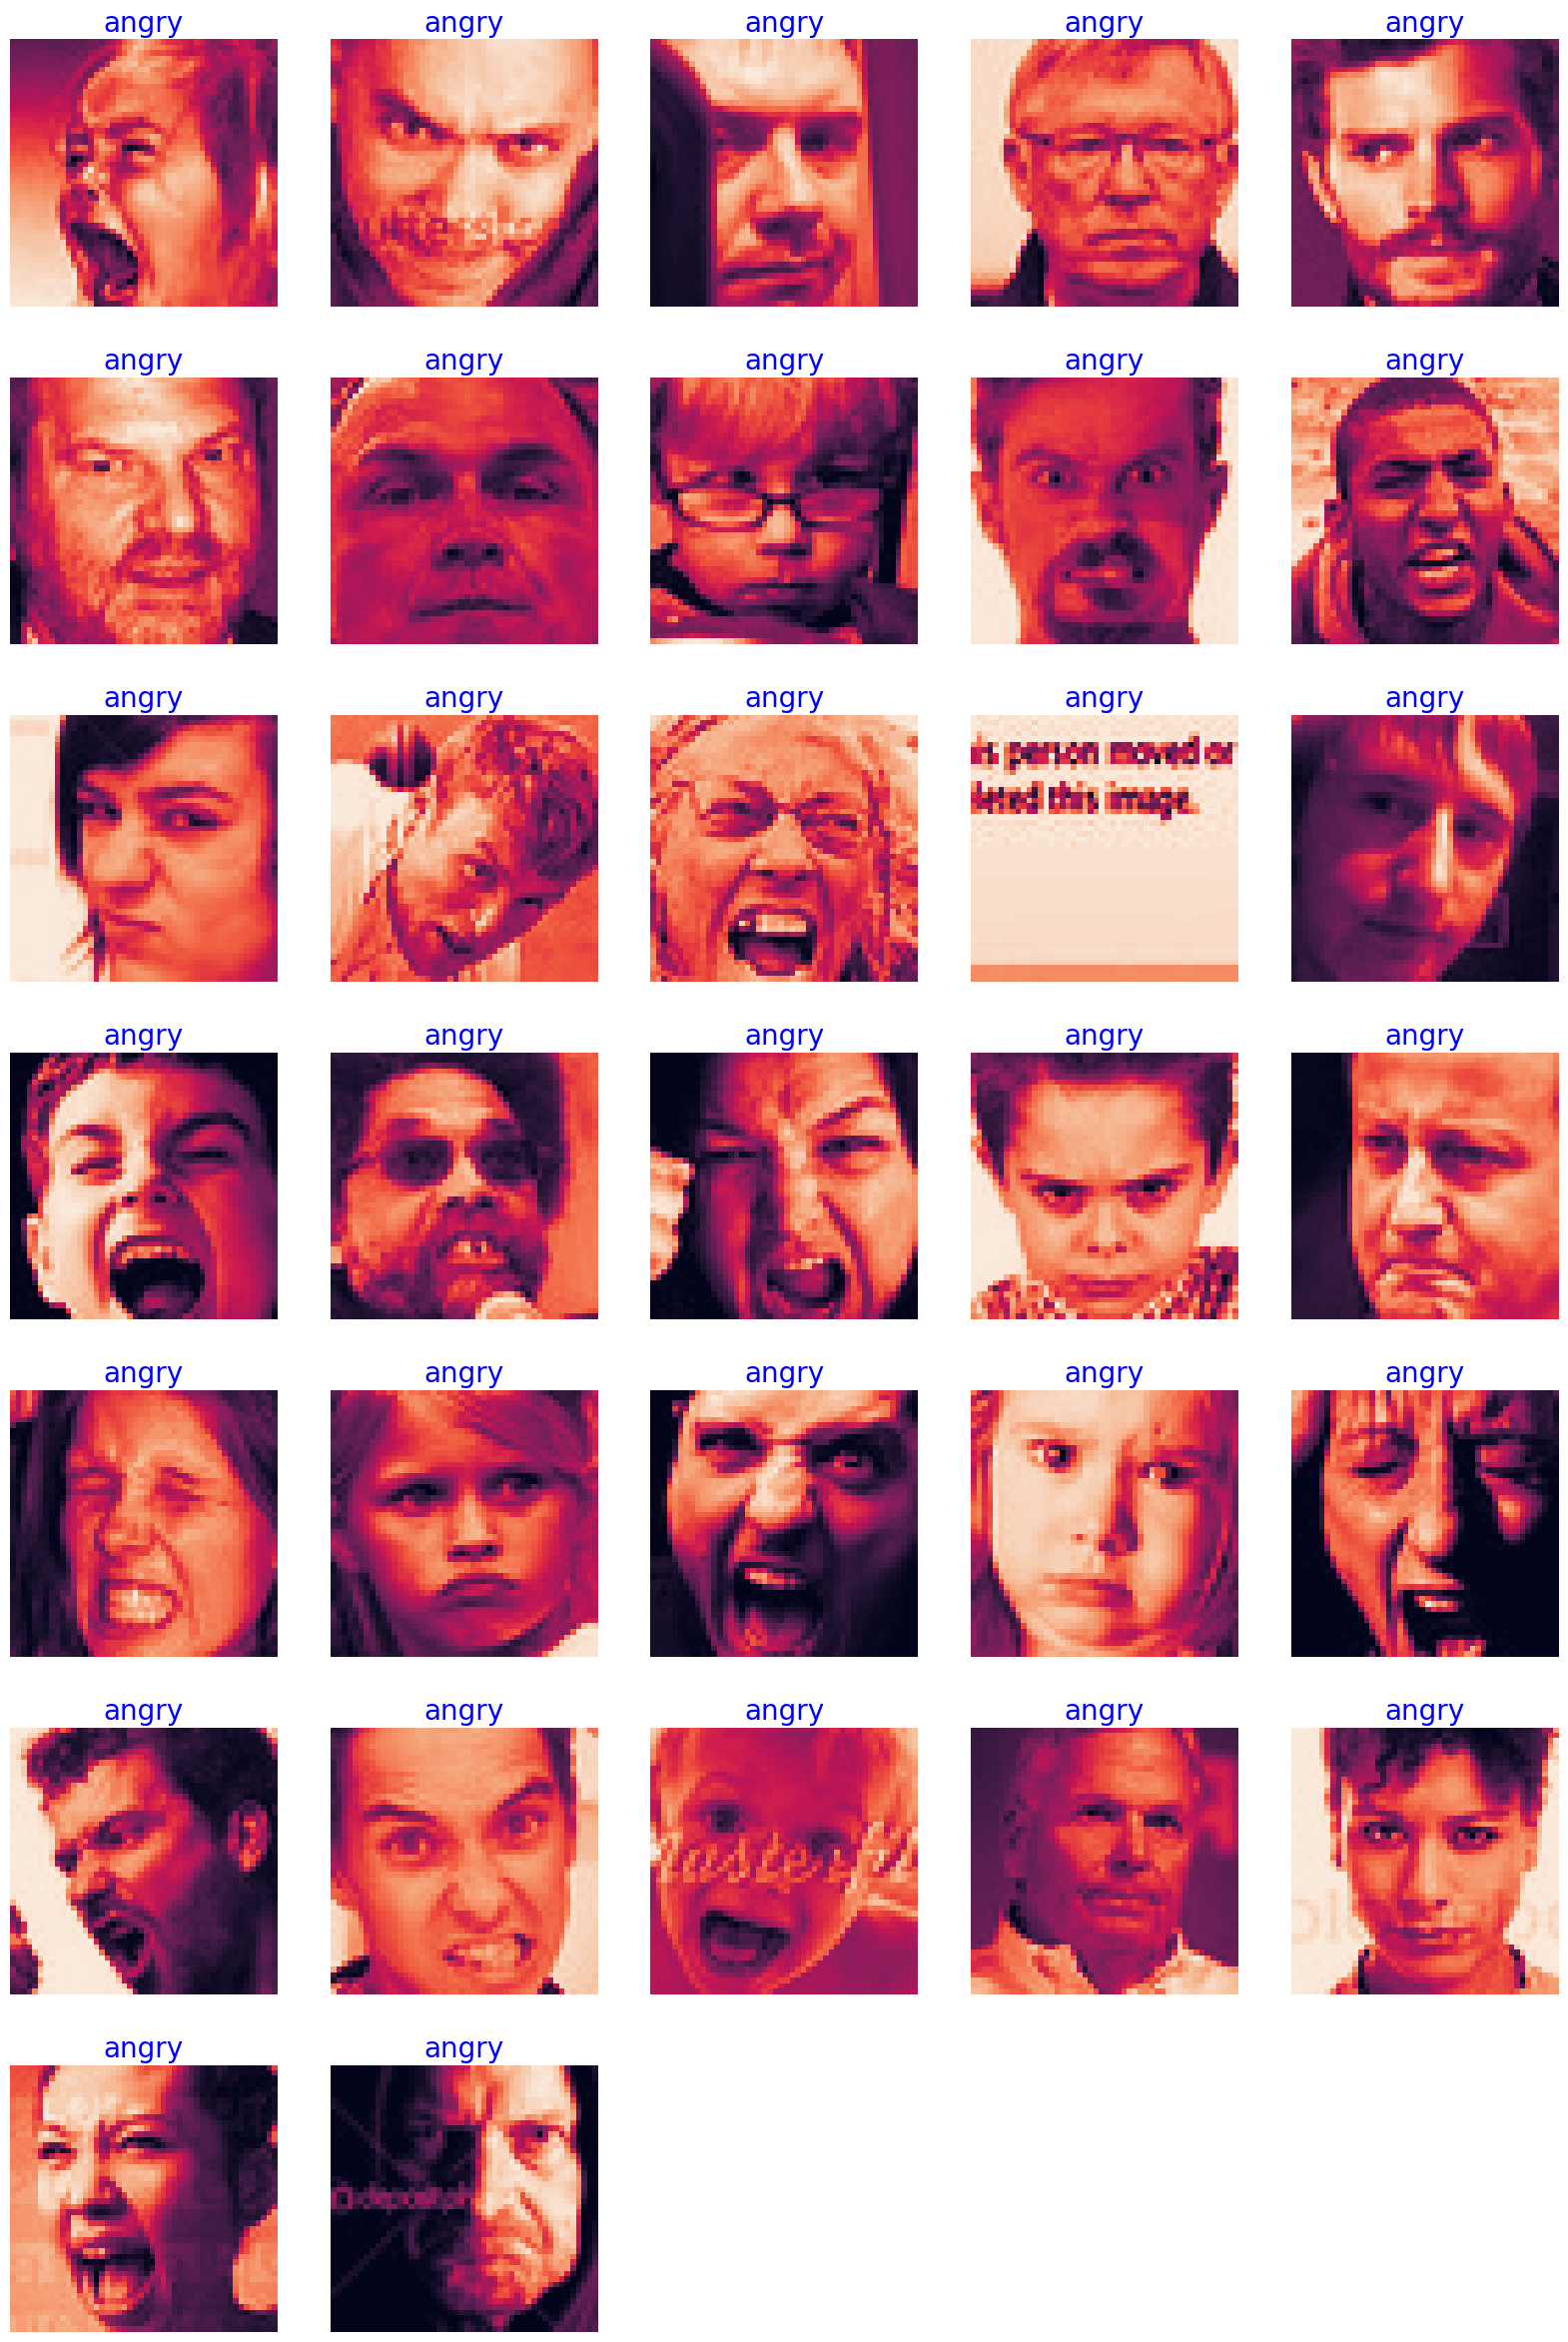

In [16]:
# Get the sample images, labels, and their filenames 
# To get the correct filename, turn off the shuffle
def plotImageWithNames(gen):
    images, labels = next(gen)
    filenames = gen.filenames
    classes = list(gen.class_indices.keys())
    
    plt.figure(figsize=(20, 30))
    length=len(labels)
    if length<32:  
        r=length
    else:
        r=32
    for i in range(r):        
        plt.subplot(7, 5, i + 1)
        image=images[i] /255
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        filename=gen.filenames[i]
        plt.title(
                    label=f"{class_name}", # \n{filename} ", 
                    color='blue', 
                    fontsize=20
                    )
        plt.axis('off')
    plt.show()

plotImageWithNames(train_set)
plotImageWithNames(val_set)

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Model Building and Compiling
    </h1>
</div>

In [17]:
# Build the model
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(picture_size, picture_size, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(no_of_classes, activation='softmax'))

In [18]:
# Define the optimizer and compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

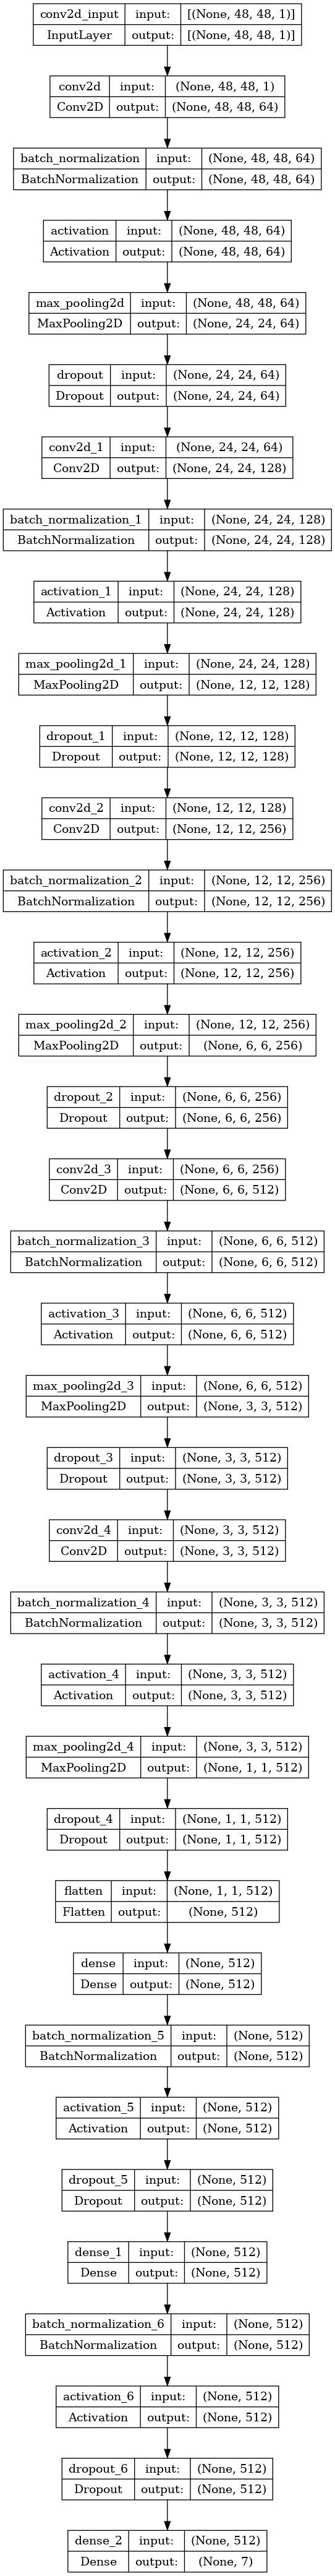

In [19]:
# Plot the Model Diagram
from sklearn import set_config 
from keras.utils.vis_utils import plot_model

set_config(display="diagram")
plot_model(model, to_file='model_diagram.png', show_shapes=True)

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Define Callback
    </h1>
</div>

In [20]:
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Model Training
    </h1>
</div>

In [21]:
# # Train the model
# history = model.fit(train_set, epochs=epochs, validation_data=val_set, callbacks=[early_stopping, reduce_lr])
history = model.fit(
    train_set,
    steps_per_epoch=train_set.n // train_set.batch_size,
    epochs=epochs,
    validation_data=val_set,
    validation_steps=val_set.n // val_set.batch_size,
    callbacks=[early_stopping, reduce_lr]
)


model.save(r"/kaggle/working/optimize3_model.h5")

Epoch 1/48


2023-07-05 10:16:38.488047: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


450/450 [==============================] - 83s 150ms/step - loss: 1.9693 - accuracy: 0.2482 - val_loss: 1.7884 - val_accuracy: 0.2753 - lr: 0.0010
Epoch 2/48
450/450 [==============================] - 36s 81ms/step - loss: 1.5311 - accuracy: 0.4079 - val_loss: 1.3885 - val_accuracy: 0.4646 - lr: 0.0010
Epoch 3/48
450/450 [==============================] - 35s 78ms/step - loss: 1.3465 - accuracy: 0.4834 - val_loss: 1.2917 - val_accuracy: 0.5102 - lr: 0.0010
Epoch 4/48
450/450 [==============================] - 36s 80ms/step - loss: 1.2605 - accuracy: 0.5213 - val_loss: 1.2374 - val_accuracy: 0.5185 - lr: 0.0010
Epoch 5/48
450/450 [==============================] - 37s 81ms/step - loss: 1.2013 - accuracy: 0.5459 - val_loss: 1.2654 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 6/48
450/450 [==============================] - 36s 81ms/step - loss: 1.1514 - accuracy: 0.5635 - val_loss: 1.2320 - val_accuracy: 0.5453 - lr: 0.0010
Epoch 7/48
450/450 [==============================] - 36s 81ms/step 

<div style = "color: Black; 
              display: fill;
              border-radius: 7px;
              background-color: #256d7c;">
    <h1 id = "import-libraries"
        style = "padding: 18px; 
                 color: #f8e7b5;
                 font-size: 35px;
                 font-family: Cambria;
                 font-weight: bold;">Model Evaluation
    </h1>
</div>

In [22]:
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: [0.275284081697464, 0.46463069319725037, 0.5102272629737854, 0.5184659361839294, 0.5178977251052856, 0.5453125238418579, 0.4164772629737854, 0.5325284004211426, 0.5731534361839294, 0.5602272748947144, 0.5775567889213562, 0.5849431753158569, 0.5874999761581421, 0.5651988387107849, 0.5563920736312866, 0.6474431753158569, 0.652556836605072, 0.6598011255264282, 0.6583806872367859, 0.659375011920929, 0.6596590876579285]


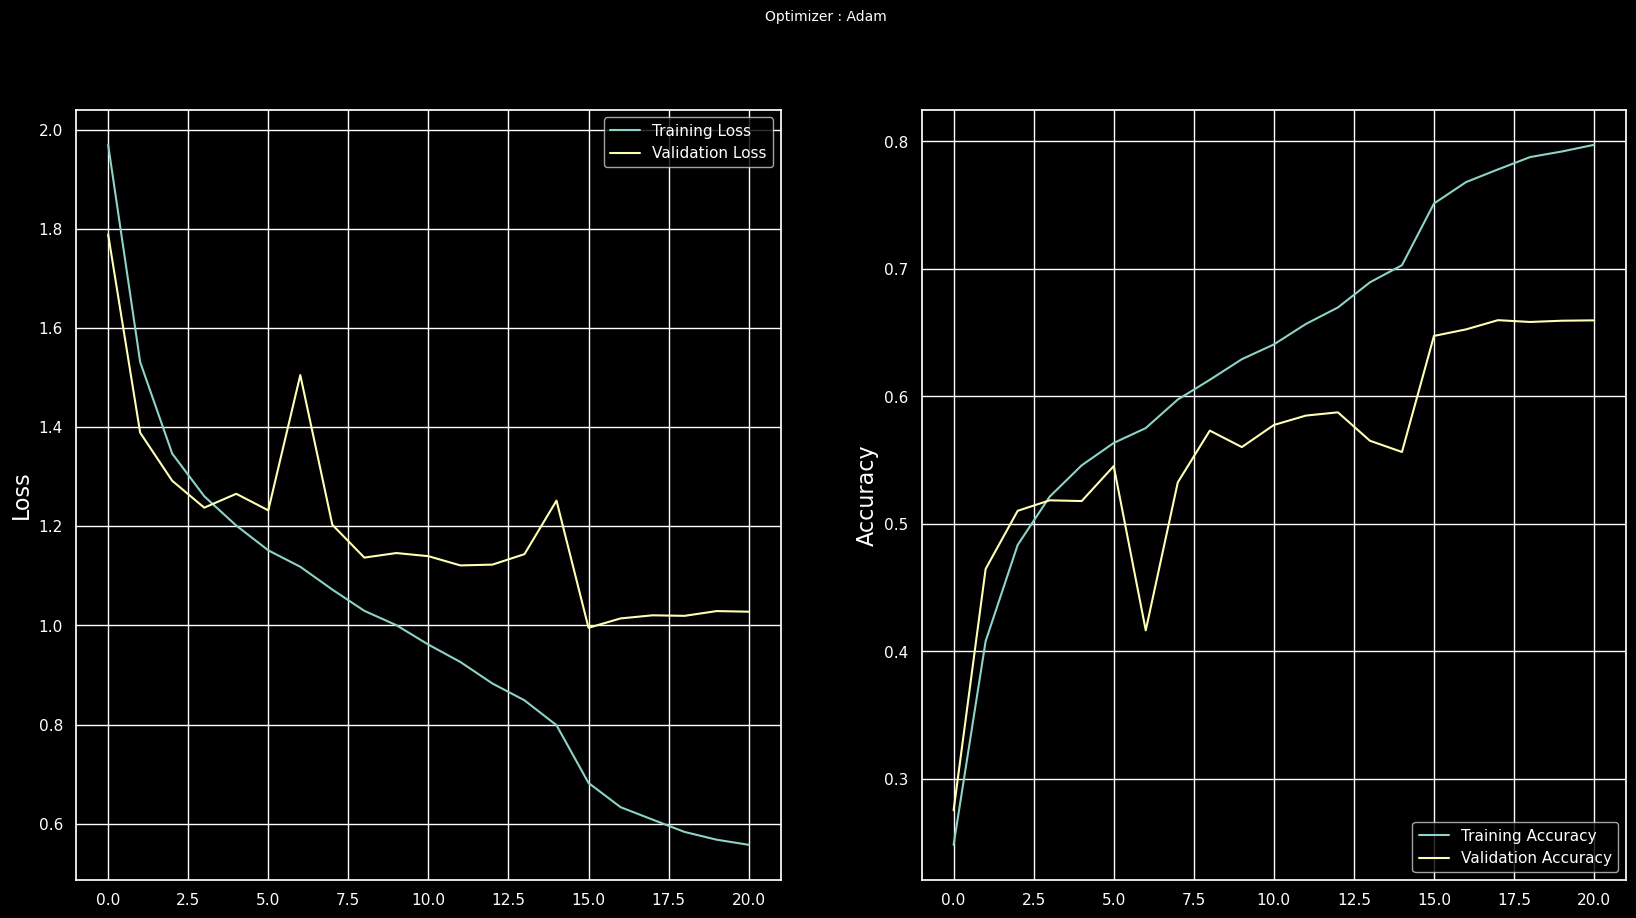

In [23]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()